# 1. Import libraries and data

In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## 1.1: Load initial CSV

In [2]:
coe_df = pd.read_csv(r"F:\Data Science Grand Track\Machine Learning\datasets\coe_pricing\COEBiddingResultsPrices.csv")

In [3]:
display(coe_df)

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium
0,2010-01,1,Category A,1152,1145,1342,18502
1,2010-01,1,Category B,687,679,883,19190
2,2010-01,1,Category C,173,173,265,19001
3,2010-01,1,Category D,373,365,509,889
4,2010-01,1,Category E,586,567,1011,19889
...,...,...,...,...,...,...,...
1855,2025-09,2,Category A,1272,1266,2521,119003
1856,2025-09,2,Category B,792,772,1273,136890
1857,2025-09,2,Category C,276,274,413,72501
1858,2025-09,2,Category D,539,539,617,9209


## 1.2. Get Cat A data

In [4]:
coe_catA_df = coe_df[coe_df['vehicle_class'] == 'Category A']

In [5]:
display(coe_catA_df)

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium
0,2010-01,1,Category A,1152,1145,1342,18502
5,2010-01,2,Category A,1151,1149,1673,20501
10,2010-02,1,Category A,1154,1153,1326,19989
15,2010-02,2,Category A,1148,1148,1493,20340
20,2010-03,1,Category A,1148,1141,1758,20802
...,...,...,...,...,...,...,...
1835,2025-07,2,Category A,1253,"1,253","1,874",101102
1840,2025-08,1,Category A,1268,"1,257","1,755",102009
1845,2025-08,2,Category A,1264,"1,257","1,922",104524
1850,2025-09,1,Category A,1275,"1,271","1,844",107889


## 1.3: Drop `month` column, keeping only numeric data

In [6]:
coe_catA_df = coe_catA_df.drop(['vehicle_class'], axis=1)

In [7]:
coe_catA_df = coe_catA_df.drop(['bidding_no', 'month'], axis=1)

In [8]:
display(coe_catA_df)

,quota,bids_success,bids_received,premium
0,1152,1145,1342,18502
5,1151,1149,1673,20501
10,1154,1153,1326,19989
15,1148,1148,1493,20340
20,1148,1141,1758,20802
...,...,...,...,...
1835,1253,"1,253","1,874",101102
1840,1268,"1,257","1,755",102009
1845,1264,"1,257","1,922",104524
1850,1275,"1,271","1,844",107889


## 1.4: Cleaning data:

### 1.4.1: Function to remove the `,` in numbers and convert it

In [9]:
def remove_extra_comma(num: str)-> int:
    num = num.replace(",", "")
    return int(num)

### 1.4.2: Apply function

In [10]:
coe_catA_df['bids_received'] = coe_catA_df['bids_received'].apply(remove_extra_comma)
coe_catA_df['bids_success'] = coe_catA_df['bids_success'].apply(remove_extra_comma)

In [11]:
display(coe_catA_df.dtypes)

quota            int64
bids_success     int64
bids_received    int64
premium          int64
dtype: object

# 2. Prepare data for training

## 2.1: Set X and y

In [12]:
X = coe_catA_df[['quota', 'bids_success', 'bids_received']].values
y = coe_catA_df['premium'].values

In [13]:
print(X.shape)
print(y.shape)

(372, 3)
(372,)


## 2.2 Split into training and testing data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. Train model using Lasso

## 3.1: Train model using training data

In [15]:
# Import LassoCV for automatic cross validation -> auto alpha
from sklearn.linear_model import LassoCV

In [ ]:
# Creating a object:
predict_classA_lasso = LassoCV(
    cv=10, # Set number of cross validation folds to 10
    random_state = 42, # Split data randomly
    max_iter=5000
).fit(X_train, y_train)

# Print out the best
print("Best alpha: {best_alpha}".format(best_alpha = predict_classA_lasso.alpha_))

Best alpha: 5626.363897393403


## 3.2: Predicting price:

In [17]:
# Predicting y (label; COE price from testing data)
y_pred = predict_classA_lasso.predict(X_test)

In [ ]:
display(y_pred)
display(y_pred.shape)

# 4. Calculating metrics

## 4.1: Plot between 

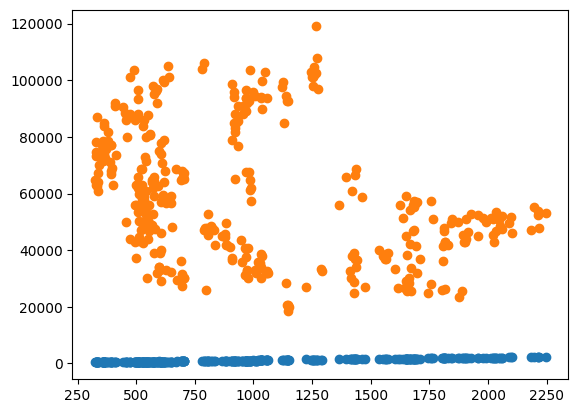

In [ ]:
plt.scatter(coe_catA_df['bids_success'], coe_catA_df['quota'])
plt.show()

## 4.2: Calculate metrics

### 4.2.1: Calculate MSE

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mse = mean_squared_error(y_pred, y_test)
print(f"Mean square error is: {mse}")


Mean square error is: 462220339.8743456


### 4.2.2: Calculate R_squared

In [33]:
r2 = predict_classA_lasso.score(X_test, y_test)
print(f"R^2 square score: {r2}")

R^2 square score: 0.12553682062655902


### 4.2.3: Calculate feature importance

In [ ]:
feature_coef = predict_classA_lasso = LassoCV(
    cv=10, # Set number of cross validation folds to 10
    random_state = 42, # Split data randomly
    max_iter=5000
).fit(X_train, y_train).coef_


[-107.38520317   83.96685537    6.06366876]


In [44]:
# Get names of
column_names = ['quota', 'bids_success', 'bids_received']


# Combine into a DataFrame for easier plotting
coef_df = pd.DataFrame({
    'Feature': column_names,
    'Coefficient': feature_coef
})

# Create the bar plot
fig = px.bar(
    coef_df,
    x='Feature',
    y='Coefficient',
    color='Coefficient',  # color based on coefficient value
    color_continuous_scale=['red', 'white', 'green'],  # negative to positive
    title='Lasso Coefficients of Factors to COE Price (Cat A)',
    labels={'Coefficient': 'Lasso Weight'}
)

fig.show()

### 4.2.4: Heat map

In [46]:
# Compute correlation matrix
corr = coe_catA_df.corr()

# Convert correlation matrix to long-form for Plotly
corr_long = corr.reset_index().melt(id_vars='index')
corr_long.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Create Plotly heatmap
fig = px.imshow(
    corr, 
    text_auto=True,
    color_continuous_scale='RdYlGn',
    title='Correlation Heatmap: Category A COE Factors',
    aspect='auto',  # keeps cells square
    zmin=-1, zmax=1
)

fig.update_layout(
    xaxis_title='Feature',
    yaxis_title='Feature',
)
fig.show()


In [48]:
# Create DataFrame for plotting (X_test columns = [quota, bids_success, bids_received])
results_df = pd.DataFrame({
    'Quota': X_test[:, 0],
    'Bids Success': X_test[:, 1],
    'Bids Received': X_test[:, 2],
    'Actual Premium': y_test,
    'Predicted Premium': y_pred
})

# Sort by Quota for smoother line visualization
results_df = results_df.sort_values(by='Quota')

# Scatter for actual data
fig = px.scatter(
    results_df,
    x='Quota',
    y='Actual Premium',
    opacity=0.6,
    color='Bids Received',
    color_continuous_scale='Viridis',
    hover_data={
        'Quota': True,
        'Bids Success': True,
        'Bids Received': True,
        'Actual Premium': ':.0f',
        'Predicted Premium': ':.0f'
    },
    title='Quota vs COE Premium (Actual vs Predicted, Colored by Bids Received)'
)

# Add line for predicted premiums
fig.add_scatter(
    x=results_df['Quota'],
    y=results_df['Predicted Premium'],
    mode='lines',
    name='Predicted Premium',
    line=dict(color='red', width=3),
    hoverinfo='skip'  # keeps hover info clean (use scatter’s hover)
)

fig.update_layout(
    xaxis_title='Quota Available',
    yaxis_title='COE Premium ($)',
    legend_title='Legend',
    coloraxis_colorbar=dict(title='Bids Received')
)

fig.show()
